# Finite Differences for Boundary Value Problems

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse as sps

We'll solve

$u''+1000(1+x^2)u=0$ on $(-1,1)$

with $u(-1)=3$ and $u(1)=-3$.

In [24]:
n = 16
#n = 200

mesh = np.linspace(-1, 1, n)
h = mesh[1] - mesh[0]

Use `sps.diags(values, offsets=..., shape=(n, n))` to make a centered difference matrix.

In [25]:
A = sps.diags(
    [1,-2,1],
    offsets=[-1,0,1], 
    shape=(n, n))

if n < 10:
    print(A.toarray())

In [26]:
diag = np.hstack(([1],-2/h**2 + 1000*(1 + mesh[1:-1]**2), [1]))
z = np.hstack(([0], np.ones(n-3)/h**2, [0]))

A = sps.diags(
    [z,diag,z],
    offsets=[-1,0,1],
    shape=(n, n)
)

if n < 10:
    np.set_printoptions(precision=1)
    print(A.toarray())

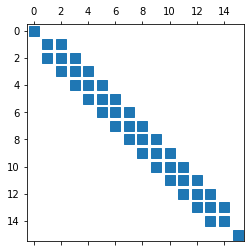

In [27]:
plt.spy(A)

Next, assemble the right-hand side as `rhs`:

Pay special attention to the boundary conditions. What entries of `rhs` do they correspond to?

In [21]:
rhs = np.zeros(n)
rhs[0] = 3
rhs[1] = -3/h**2
rhs[-2] = 3/h**2
rhs[-1] = -3

To wrap up, solve and plot:

In [22]:
import scipy.sparse.linalg as sla

sol = sla.spsolve(A, rhs)

/usr/local/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:133: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


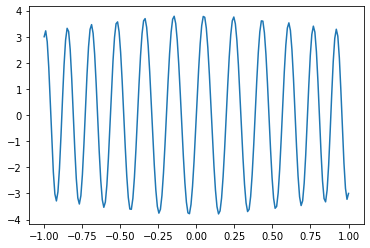

In [23]:
plt.plot(mesh, sol)

In [29]:
A
B = A.tocoo()

In [30]:
B

<16x16 sparse matrix of type '<class 'numpy.float64'>'
	with 42 stored elements in COOrdinate format>

In [31]:
B.nnz

42

In [32]:
B.shape

(16, 16)

In [33]:
16*16

256

In [34]:
B.row

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13], dtype=int32)

In [35]:
B.col

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14], dtype=int32)

In [36]:
B.data

array([5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01,
       5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 1.0e+00,
       1.6e+03, 1.4e+03, 1.2e+03, 1.1e+03, 1.0e+03, 9.3e+02, 8.9e+02,
       8.9e+02, 9.3e+02, 1.0e+03, 1.1e+03, 1.2e+03, 1.4e+03, 1.6e+03,
       1.0e+00, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01,
       5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01, 5.6e+01])

In [ ]:
A.to